# Train test spilt

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Data = pd.read_csv('abalone.csv')
y = Data['Rings']
data=Data.drop('Rings',axis=1)
X=data.columns.tolist()


In [2]:

X_train, X_test,Y_train,Y_test = train_test_split(Data.iloc[:,:7],Data.iloc[:,-1] ,test_size=0.3, random_state=42)
X_train.to_csv('abalone_train.csv', index=False)
X_test.to_csv('abalone_test.csv', index=False)



# Pearson

In [3]:
def pearson(x_array,y_array):
    numerator=0
    x_array=x_array-np.mean(x_array)
    y_array=y_array-np.mean(y_array)
    for i in range(0,len(x_array)):
        numerator=(x_array[i])*(y_array[i])+numerator
    r2=0
    r3=0    
    for j in range(0,len(x_array)):
        r2=(x_array[j])**2+r2
        r3=(y_array[j])**2+r3
    denominator=(r2*r3)**0.5
    ans=numerator/denominator
    return round(ans,2)
correlation=[]
for i in range(len(X)):
    num=pearson(np.array(X_train[X[i]]),np.array(Y_train))
    correlation.append(num)
correlation


[0.55, 0.57, 0.54, 0.53, 0.41, 0.5, 0.63]

# Model Training

In [4]:
features=np.array(X_train[X[correlation.index(max(correlation))]])
# print((X_train))
# features
w1=np.dot((features-np.mean(features)),(Y_train - np.mean(Y_train)).T)/(np.sum(pow(features - np.mean(features),2)))
b = np.mean(Y_train) - w1*np.mean(features)


# Predict

In [5]:
features_test =np.array(X_test[X[correlation.index(max(correlation))]])
ypred = features_test*w1 + b

# Plot for train

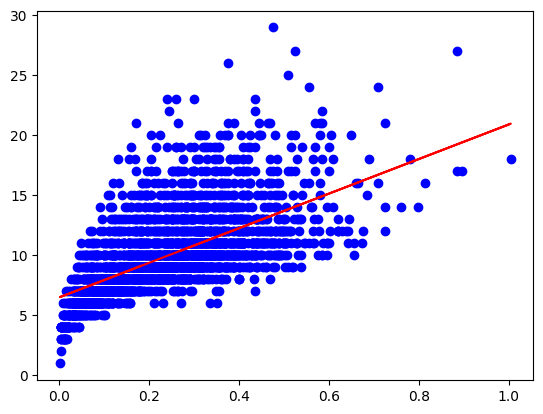

In [6]:
plt.scatter(features,Y_train,c='b')
plt.plot(features,features*w1 + b,c='r')

# RMSE on Test

In [7]:
rmse = pow(np.sum(pow(Y_test - ypred,2))/len(ypred),0.5)
rmse

2.467940147010543

# Scatter Plot for Test

Text(0, 0.5, 'Predicted')

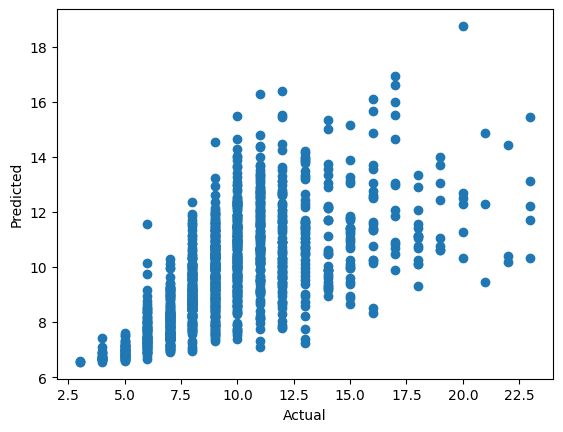

In [8]:
plt.scatter(Y_test,ypred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# (iii)Simple Non-Linear

# Power function

In [9]:
def poly(x_array,y_array,n):
    input=np.empty((len(x_array),n+1))
    for j in range(len(x_array)):
        l=[]
        for i in range(0,n+1):
            l.append(pow(x_array[j],i))
        input[j]=l   
    w=np.dot(np.linalg.inv(np.dot(input.T,input)),np.dot(input.T,y_array))  
    y=np.dot(input,w)
    return y
r=poly(features,(Y_train),5)
r[0]













 

 



9.670686330409442

# RMSE

In [10]:
def RMSE(x_array,y_array):
    rmse=pow(np.sum(pow((x_array-y_array),2))/len(x_array),0.5)
    return rmse

# Plot of Y_train and predicted value

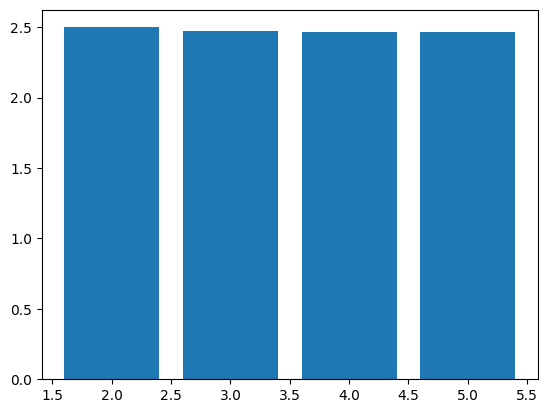

In [11]:

x=[2,3,4,5]
y=[]
for i in range(len(x)):
    a=RMSE(Y_train,poly(features,Y_train,x[i]))
    y.append(a)
plt.bar(x,y)
plt.show()
    

# Plot of Y_test and predicted value

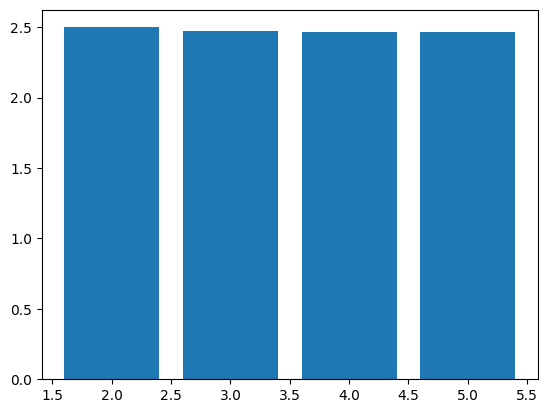

In [12]:
h=[]
feature=np.array(X_test[X[correlation.index(max(correlation))]])
for i in range(len(x)):
    a=RMSE(Y_test,poly(feature,Y_test,x[i]))
    h.append(a)
plt.bar(x,y)
plt.show()



# Fitting the best fit curve

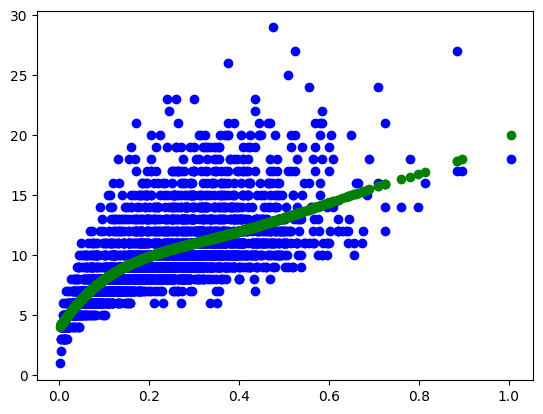

In [13]:
plt.scatter(features,Y_train,c='b')

a= poly(features,Y_train,x[y.index(min(y))])
plt.scatter(features,a,c='g')